# Wednesday: Classification chapter 3 

Logistic regression is used when the number of response categories exceeds 2, here we run into the problem that if we use the dummy with linear regression the model assumes effect between category 1, 2 is the same as 2, 3. This is because we use integers to describe the classes, additionally as we often want to have a probablity for an instance belonging to a class, linear regression might produce probablities less than zero or bigger than one. 

&rarr; example: predicting eye color based on genetic data

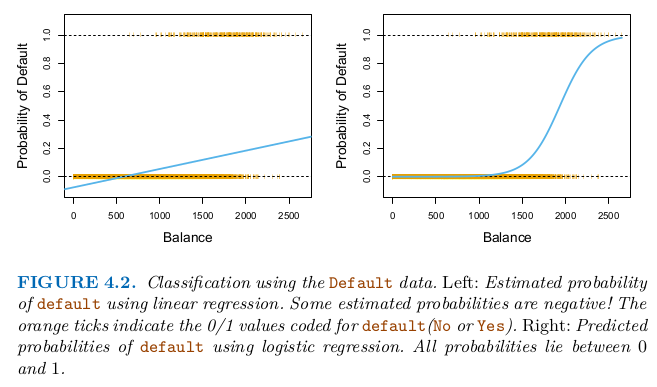

The logistic regression model is given the formula: $$p(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_X}}$$
This rases euler to a linear model and since on the bottom we have a +1, if $\beta_0, \beta_1$ become infinitely large this probablity will approach 1 and viceversa 0. This function is seen Figure 2 and is used as it has two asymptotes which is exactly what normal regression does not have. Following from this is the ***log odds*** transformation which is given by taking the log of the above formula 

To estimate the model from data we use maximum likelihood which optimizes the parameters $\beta_0,\beta_1$ so that the probabilities ar maximized for all individuals being in their respective class. 

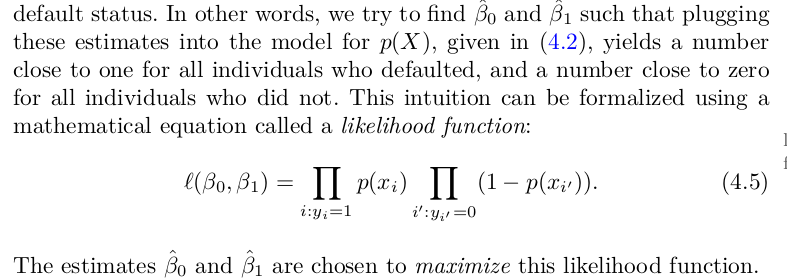

So in short logistic regression fits a linear line &rarr; transform it to a probability curve &rarr; rotate the linear line so that likelihood (i.e. the probability of observing the true data) is maximimized. 

***Problem with only using a single predictor when more are of importance***: When using only a single predictor the relationship might be different as you are not including the **confounders** this is especially so when there is a correlation among predictors. 

In multinomial regression we aim to classify K-classes, with only a slight modification to the probability model. The baseline is set at an arbitrary class which is not problematic for prediction howevert it is for inference as the parameters of the model might change based on the selected baseline class. 

$$Pr(Y=k|X=x)=\frac{e^{\beta_{k0}+\beta_{k1x1}+\beta_{kpxp}}}{1+\sum_{l=1}^{k-1}e^{\beta_{l0}+\beta_{l1x1}+\beta_{lpxp}}}$$

and 

$$\log(\frac{Pr(Y=k|X=x)}{Pr(Y=K|X=x)})=\beta_{k0}+\beta_{k1x1}+\beta_{kpxp}$$

**softmax regression**
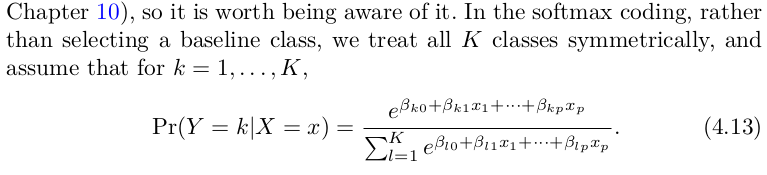

**case control sampling**

Adjusting $\beta_0$ :
$$\hat{\beta_0^*} = \hat{\beta_0} + \log{\frac{\pi}{1-\pi}} - \log{\frac{\tilde{\pi}}{1-\tilde{\pi}}}$$
with $\pi$ = true probability, and $\tilde{\pi}$ = estimated probability. The shape of the curve is not dependent on the control but on the cases, as we are aiming to infer the relationship of the predictor and response.

&rarr; To reduce the size of dataset where the probability of X is very low i.e. the dataset would only contain a very number of cases and a very large number of controls. At a certain ratio (control/case) there are diminished returns. 

&rarr; To circumvent following a group of subject for a longtime e.g. when aiming to identifying risk factors for disease. Here you would sample a number of cases and controls from the current population instead of following a group of people for 20 years.

# Exercises

**9. This problem has to do with odds.**

(a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?

37 percent of the people will default on their creditcard

In [32]:
0.37/(1+0.37)

0.27007299270072993

(b) Suppose that an individual has a 16 % chance of defaulting on
her credit card payment. What are the odds that she will de-fault?

In [33]:
x = 0.16

x /(1-x)

0.1904761904761905

**6. Suppose we collect data for a group of students in a statistics class with variables X1 = hours studied, X2 = undergrad GPA, and Y =
receive an A. We fit a logistic regression and produce estimated
coefficient, β̂0 = −6, β̂1 = 0.05, β̂2 = 1.**

(a) Estimate the probability that a student who studies for 40 h and
has an undergrad GPA of 3.5 gets an A in the class.

In [35]:
def prob_A(h, gpa):
    odds = np.e**(-6 + 0.05 * h + 1 * gpa)
    p_yx = odds/ (1 + odds)
    return p_yx

prob_A(40, 3.5)

0.37754066879814546

(b) How many hours would the student in part (a) need to study to
have a 50 % chance of getting an A in the class?

In [45]:
2.5/0.05

50.0

**Given dataset X and Y below, and given logistic regression giving $\beta_0=-3.296, \beta_1=2.197$ calculate the maximum likelihood using:
$$\log({L})=\sum_{i=1}^N (y_i(\beta_0+\beta_1x_i)-\log{(1+e^{\beta_0+\beta_1x_i}))}$$**
**Randomly pick another value for $\beta_1, \beta_2$ and calculate the maximum likelihood for these**

In [ ]:
X = [1,1,1,1,2,2,2,2]
Y= [0,0,0,1,0,1,1,1]
b0, b1 = -3.296, 2.197

def maxL(b0,b1, X, Y):
    p1 = lambda x, y :(y * (b0 + b1*x)) - np.log(1+(np.e**(b0 + b1 *x)))
    calc = [p1(x, y) for x, y in zip(X,Y)]
    return np.e**np.sum(calc)

maxL(b0, b1, X, Y)
l=10
while l > 0.00001:
    b0, b1 = np.random.rand(), np.random.rand()
    l = maxL(b0,b1, X, Y)
print(b0, b1)
print(l)

**1. Using a little bit of algebra, prove that (4.2) is equivalent to (4.3). In
other words, the logistic function representation and logit represen-
tation for the logistic regression model are equivalent.**

$$p(X)=\frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1 X}}$$
$$\frac{p(X)}{1-p(X)}=e^{\beta_0+\beta_1X}$$

&rarr; if the probability of succes is the first formula than the probability is 1 -p(X) is the formula below.

&rarr; then we can use cross multiplication to get $\frac{1}{e^{\beta_0+\beta_1 X}}$

&rarr; then we can say (note that we reverse the numerator and denominator as we have a stacked fraction)$$\frac{p(X)}{1-p(X)}=\frac{e^{\beta_0+\beta_1 X}}{1+e^{\beta_0+\beta_1 X}} * \frac{e^{\beta_0+\beta_1 X}}{1} = e^{\beta_0+\beta_1 X}$$
